<h1 style="text-align: center;">openEO: odprta oblačna storitev za opazovanje Zemlje <img src="./fig/openeologo.png" style="vertical-align: middle; margin-left: 10px; width: 80px; height: auto;"></h1>

## Uvod

Copernicus Data Space Ecosystem (CDSE) olajša obdelavo podatkov o opazovanju Zemlje (EO) v oblaku prek poenostavljenih API-jev za dostop do podatkov, vključno z API-jem openEO. OpenEO je inovativen standard za dostop, obdelavo in analizo različnih podatkov opazovanja Zemlje.

### Zakaj openEO?

Tradicionalno je bila obdelava podatkov EO zapletena in zamudna, saj so morali uporabniki lokalno poiskati, prenesti in predobdelati velike podatkovne nize. Pomanjkanje standardizacije in medsebojne povezljivosti med ponudniki podatkov EO ter omejeni prilagodljivi in stroškovno učinkoviti računalniški viri so proces še dodatno zapletli. Posledično raziskovalci pogosto porabijo veliko časa in virov za pripravo in obdelavo podatkov, kar jih odvrača od osredotočanja na analizo in interpretacijo podatkov.

**Pred openEO**
 <div style="flex: 1;align-items: right; max-height: 500px;">
    <img src="./fig/traditional.png" style="height: 400px; width: auto;padding-left: 20px;">
  </div>

Posledično so se **platforme za obdelavo v oblaku** uveljavile kot priljubljena in standardna rešitev.

<div style="display: flex; align-items: stretch;">
  <div style="flex: 3; padding-left: 5px; text-align: left;max-width: 600px;">
    <h2>Kaj je openEO?</h2>

openEO je **odprtokodni** API za obdelavo podatkov EO v oblaku.

Standardizira tradicionalni potek obdelave podatkov EO in ponuja **enotno** rešitev za poenostavitev **dostopa, obdelave in analize** različnih podatkovnih nizov EO z uporabo znanih programskih jezikov, kot je Python. Uporabniki lahko brez težav **delijo** kodo, poteke dela in algoritme za obdelavo podatkov med različnimi platformami in orodji, kar omogoča enostaven **dostop, prilagodljivost in ponovljivost**.

<p><h4>Dodana vrednost openEO</h4>


* **Skalabilna** obdelava
* **Standardiziran** sistem, ki omogoča **medsebojno povezljivost** različnih platform
* **Neodvisnost** od osnovnih tehnologij in programskih knjižnic
*  Načela **FAIR** and **odprte znanosti**

Zato lahko razvijalci, raziskovalci in podatkovni znanstveniki z uvedbo openEO učinkovito uporabljajo razpršena računalniška okolja in vire v oblaku za reševanje kompleksnih geoprostranskih izzivov. 
  </div>
  <div style="flex: 1;align-items: right; max-height: 500px;">
    <img src="./fig/openeo.png" alt="openEO" style="height: 100%; width: auto;padding-left: 100px;">
  </div>
</div>




## Kje začeti?

Za začetnike je dokumentacija openEO API-ja [„Getting Started“](https://documentation.dataspace.copernicus.eu/APIs/openEO/Python_Client/Python.html) dobra izhodiščna točka, saj ponuja izčrpen vodnik in primere, ki vam bodo pomagali na začetku.

Naprednim uporabnikom bo koristno raziskati zmogljivosti openEO, vključno z upoštevanjem načel FAIR, odprtimi znanstvenimi praksami, obdelavo velikih količin podatkov in še več.


## Kako začeti z openEO?

openEO se lahko uporablja v različnih scenarijih opazovanja Zemlje (EO), od preprostih do zapletenih delovnih tokov. Vsak delovni tok openEO običajno vključuje štiri korake:

1. Povezava z backendom openEO.
2. Odkritje in nalaganje zbirke podatkov.
3. Izvedba procesa.
4. Izvedba delovnega toka.

Po teh korakih bomo prikazali preprost primer uporabe za analizo vročinskih valov na Nizozemskem. Z uporabo API-ja openEO lahko uporabniki izberejo JavaScript, Python ali R kot svojo knjižnico odjemalca. V tem primeru bomo uporabili knjižnico Python.

Uporabniki lahko izberejo katero koli okolje Python za zagon tega zvezka ali uporabo knjižnice odprtokodnega Python odjemalca openEO. Copernicus Data Space EcoSystem pa ponuja okolje JupyterLab, ki vključuje jedro openEO Python. Do tega okolja lahko dostopate na: https://jupyterhub.dataspace.copernicus.eu/

Podrobna navodila za uporabo okolja JupyterLab so na voljo v [JupyterLab User Guide](https://documentation.dataspace.copernicus.eu/Applications/JupyterHub.html).


Pred začetkom delovnega toka se prepričajte, da so v okolju Python nameščene vse potrebne knjižnice, vključno z odjemalcem openEO. Če niso, jih namestite z:

```python
!pip install openeo
```

Podobno za R (za več informacij o R obiščite [to povezavo](https://documentation.dataspace.copernicus.eu/APIs/openEO/R_Client/R.html)):

```r
install.packages("openeo")
library(openeo)
```

In [2]:
# Poskrbite, da so naslednji paketi nameščeni, če še niso.
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 2.5 MB/s eta 0:00:00 0:00:01


## Primer uporabe openEO: analiza vročinskega vala na Nizozemskem

In [3]:
# Naložite potrebne knjižnjice
import openeo
import json
import folium

### Korak 1: Povezava z backendom openEO

Z uporabo izbrane knjižnice odjemalca lahko uporabnik dostopa do podatkov in procesov iz več backendov:

![](./fig/backends.png)

Nato vzpostavimo povezavo z openEO backendom z uporabo njegovega povezovalnega URL-ja. V tem zvezku bomo uporabili Copernicus Data Space Ecosystem, oblačno platformo, ki jo podpirajo Evropska komisija, ESA in Copernicus. Povezovalni URL je: https://openeo.dataspace.copernicus.eu/

**Prihaja tudi**:
    
![](./fig/openeofed.png)


url bo https://openeofed.dataspace.copernicus.eu/ 

In [4]:
# povežimo se z ozadjem CDSE
connection = openeo.connect(url="openeo.dataspace.copernicus.eu")
connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

Dodatne informacije o avtentifikaciji najdete na [povezavi](https://open-eo.github.io/openeo-python-client/auth.html).

Za povzetek korakov v primerjavi s tradicionalnim potekom dela so v tem konkretnem primeru uporabe vključeni naslednji koraki:

<div style="display: flex; align-items: stretch;">
  <div style="flex: 3; padding-right: 20px; text-align: left;max-width: 600px;">
<p>
    
1. **Naložite Sentinel 3** iz CDSE backenda za **območje in čas, ki vas zanimata**
2. Uporabite razpoložljive **procese** ali opredelite nove **funkcije, ki jih določi uporabnik (UDF)** v delovnem toku
3. Opredelite **konfiguracijo naloge** openEO in jo **pošljite** </p>
  </div>
  <div style="flex: 1;align-items: right; max-height: 300px;">
    <img src="./fig/traditional.png" style="height: 100%; width: auto;padding-left: 20px;">
  </div>
</div>


### Korak 2: Odkrijte in naložite zbirko podatkov.

Podatki o opazovanju Zemlje so organizirani v tako imenovanih zbirkah. Z metodami na objektu `connection` lahko programsko prikažete sezname zbirk, ki so na voljo v ozadju, in njihove metapodatke. Poleg tega lahko za vizualizacijo razpoložljivih zbirk in metapodatkov na uporabniku prijazen način obiščete tudi [openEO hub](https://hub.openeo.org/)  ali raziščete [backend specific openEO web editor](https://openeo.dataspace.copernicus.eu/).  

Programsko uporabite `connection.list_collection_ids()` da prikažete vse ID-je zbirk v backendu, in `connection.describe_collection("SENTINEL3_SLSTR_L2_LST")`, da pridobite metapodatke za posamezno zbirko. Podobno, da bi razumeli razpoložljive vgrajene procese openEO, natisnite `connection.list_processes()` in `connection.describe_process("aggregate_temporal")`.

In [13]:
import os

os.chdir("/home/jovyan/samples/openeo/openEO Introduction")
print(os.getcwd())


/home/jovyan/samples/openeo/openEO Introduction


V tem primeru se uporablja zbirka `SENTINEL3_SLSTR_L2_LST`. Najprej določite območje, ki vas zanima, in časovno obdobje.

In [14]:
# definiraj AOI in časovniobseg podatkov
def read_json(filename: str) -> dict:
    with open(filename) as input:
        field = json.load(input)
    return field


dates = ["2023-06-01", "2023-10-30"]
aoi = read_json("Netherlands_polygon.geojson")


In [15]:
m = folium.Map([51.5, 5], zoom_start=7)
folium.GeoJson(aoi).add_to(m)
m

In [16]:
# Sentinel 3 from CDSE backend
lst = connection.load_collection(
    "SENTINEL3_SLSTR_L2_LST",
    temporal_extent=dates,
    spatial_extent=aoi,
    bands=["LST"],
)

# load cloud masking
mask = connection.load_collection(
    "SENTINEL3_SLSTR_L2_LST",
    temporal_extent=dates,
    spatial_extent=aoi,
    bands=["confidence_in"],
)

Tukaj uporabljamo proces `load_collection`, ki naloži zbirko iz trenutnega backenda po njenem identifikatorju. Zbirka se naloži kot podatkovna kocka, omejena s parametri spatial_extent, temporal_extent, bands in properties.

S čimprejšnjim filtriranjem (v tem primeru neposredno v `load_collection()`) zagotovimo, da backend naloži samo podatke, ki nas zanimajo, kar izboljša zmogljivost in zniža stroške obdelave.

openEO uporablja koncept podatkovnih kock, ki so večdimenzionalni nizi z eno ali več prostorskimi in/ali časovnimi dimenzijami. Ta pristop omogoča prilagodljivo predstavitev podatkovnih kock, tako da uporabnikom ni treba ravnati z datotekami, formati, nalaganjem podatkov ali upravljanjem pomnilnika. Za podrobnejše informacije obiščite [EO-College: tečaj Cubes and Clouds](https://eo-college.org/courses/cubes-and-clouds/).

V tem primeru naložimo dva ločena podatkovna kuba: lst in mask. Plast mask se kasneje uporabi za maskiranje podatkov nizke kakovosti ali nezanesljivih podatkov iz plasti lst.

Več o odkrivanju, nalaganju in filtriranju podatkov izveste na [Iskanje in nalaganje podatkov](https://open-eo.github.io/openeo-python-client/data_access.html).

### Step-3: Implement your process

In [17]:
mask = mask >= 16384

lst_masked = lst.mask(mask).aggregate_temporal_period(period="day", reducer="max")
lst_masked

Next, we define a User Defined Function (UDF) that takes in the datacube and checks whether both the conditions are satisfied:
* temperature above 295 Kelvin for atleast 5 days
* temperature above 295-300 Kelvin continues for atleast 3 days

If the values meet the designated threshold and continue for more than two days, a new resulting array is generated and returned.

Please note that, here we gave 295 and 300 Kelvin as two thresholds since we chose a relatively small region. You can change match your requirement. 

In [18]:
# user-defined functions in openEO
# this can also be included in a seperate file: `udf = openeo.UDF.from_file("user_defined_function.py")`
udf = openeo.UDF(
    """
import xarray
from openeo.udf import inspect

def apply_datacube(cube: xarray.DataArray, context: dict) -> xarray.DataArray:
    
    condition_all_above_295 = (cube > 295).rolling(t=5).construct('window_dim').all(dim='window_dim')
    
    condition_at_least_3_above_300 = (cube > 300).rolling(t=5).construct('window_dim').sum(dim='window_dim') >= 3
    
    result = condition_all_above_295 & condition_at_least_3_above_300
    
    return result
"""
)

In [19]:
heatwave_loc = lst_masked.apply_dimension(process=udf, dimension="t")

Following the conditional check with our `UDF`, let us use `sum` as the reducer to count the total number of times each pixels had a heat wave in the Netherlands during June-September 2023.

In [20]:
heatwave_loc = heatwave_loc.reduce_dimension(reducer="sum", dimension="t")

Please note that while this looks like an operation going so quick, there is no real data processing going so far. The **heatwave_loc** object, at this point, is just an abstract representation of our algorithm under construction.

As an illustration of this, you can also have look at the JSON representation of the algorithm so far, by simply printing them as json: `print(heatwave_loc.to_json())`

#### Step-4: Run the workflow

Finally, to trigger an actual execution (on the backend), we have to explicitly send the above representation to the backend. You can do this either synchronously(simple download) or using the batch-job-based method. Most of the simple, basic openEO usage examples show synchronous downloading of results. Synchronous downloads are handy for quick experimentation on small data cubes.

This only works properly if the processing doesn’t take too long and is focused on a smaller area of interest. However, you have to use batch jobs for the heavier work (larger regions of interest, larger time series, more intensive processingile.

Since the workflow covers an entire country, the processing might be time intensive. Therefore, we can use the job configuration capabilities provided in openEO to execute the workflow when using batch job-based methods.

You can find more information on Job configuration on [this page](https://documentation.dataspace.copernicus.eu/APIs/openEO/job_config.html).

In [21]:
# job configuration

job_options = {
    "executor-memory": "2G",
    "executor-memoryOverhead": "3G",
    "executor-cores": "2",
}

Depending on the datacube that is created by the process graph and the use case, we can export the results to more suitable formats supported by openEO. Explore the supported file formats in [this page](https://documentation.dataspace.copernicus.eu/APIs/openEO/File_formats.html).

Here, let’s download this as NetCDFFF file. 

In [22]:
# running a batch job

heatwave_job = heatwave_loc.execute_batch(
    title="Total Heatwave Days in the Netherlands",
    outputfile="Heatwave_NL.nc",
    job_options=job_options,
)

0:00:00 Job 'j-26021720405842d58b8908fd3d84e238': send 'start'
0:00:14 Job 'j-26021720405842d58b8908fd3d84e238': created (progress 0%)
0:00:20 Job 'j-26021720405842d58b8908fd3d84e238': created (progress 0%)
0:00:26 Job 'j-26021720405842d58b8908fd3d84e238': created (progress 0%)
0:00:34 Job 'j-26021720405842d58b8908fd3d84e238': created (progress 0%)
0:00:44 Job 'j-26021720405842d58b8908fd3d84e238': created (progress 0%)
0:00:56 Job 'j-26021720405842d58b8908fd3d84e238': queued (progress 0%)
0:01:11 Job 'j-26021720405842d58b8908fd3d84e238': queued (progress 0%)
0:01:31 Job 'j-26021720405842d58b8908fd3d84e238': running (progress N/A)
0:01:55 Job 'j-26021720405842d58b8908fd3d84e238': running (progress N/A)
0:02:25 Job 'j-26021720405842d58b8908fd3d84e238': running (progress N/A)
0:03:02 Job 'j-26021720405842d58b8908fd3d84e238': running (progress N/A)
0:03:49 Job 'j-26021720405842d58b8908fd3d84e238': running (progress N/A)
0:04:47 Job 'j-26021720405842d58b8908fd3d84e238': running (progress N/

### openEO Web-editor

Though this documentation mainly discusses how to programmatically create and interact with batch jobs using the openEO Python client library. Users can also use the web-based interactive environment to manage and monitor their batch jobs; feel free to switch to an openEO web editor like openeo.dataspace.copernicus.eu/ at any time. After logging in with the same account, the batch jobs should be listed under the “Data Processing” tab. More information on using the openEO web editor is discussed [here](https://documentation.dataspace.copernicus.eu/Applications/WebEditor.html).

![](./fig/web_editor.png)


To summarise key features of openEO web-editor:

 the openEO Web Editor can act as a simple interface for:

Data Discovery: User can explore and discover available Earth observation datasets.
Workflow Creation: User can create an openEO processing workflow from basic building blocks in a drag-and-drop interface.
Workflow Execution: Once User have defined their processing workflow and configured the parameters, User can execute the workflow using the Web Editor.
Result Visualization: User can explore the output data on interactive maps, generate charts and graphs
Job Management: The Web Editor allows you to monitor your processing jobs, view job histories, and access the generated results.

### Let us visualise the result

In [23]:
import matplotlib
import xarray as xr
import numpy as np

In [24]:
heatwave = xr.load_dataset("Heatwave_NL.nc")

In [25]:
data = heatwave[["LST"]].to_array(dim="bands")[0]
data.values[data == 0] = np.nan

In [26]:
lon, lat = np.meshgrid(
    data.x.values.astype(np.float64), data.y.values.astype(np.float64)
)
cm = matplotlib.colormaps.get_cmap("hot_r")
colored_data = cm(data / 20)


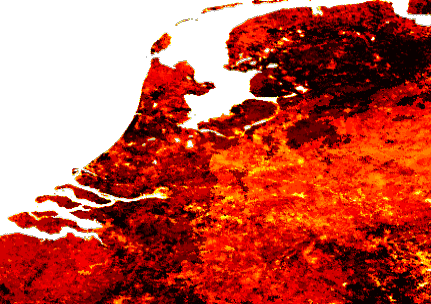

In [27]:
m = folium.Map(location=[lat.mean(), lon.mean()], zoom_start=8)
folium.raster_layers.ImageOverlay(
    colored_data,
    [[lat.min(), lon.min()], [lat.max(), lon.max()]],
    mercator_project=True,
    opacity=0.5,
).add_to(m)
m

## Credit cost

In [28]:
print(
    f" The total openEO credits consumed when executing heatwave workflow is {heatwave_job.describe()['costs']} credits."
)

 The total openEO credits consumed when executing heatwave workflow is 8 credits.


**4000** credits are freely allocated for research purposes to all users, and these credits are replenished monthly.

However, please note that the cost mentioned above was **incurred during the preparation of this notebook and could change over time**.

## openEO Algorithm Plaza: Reusability

Often, users have specific (sub)graphs that reoccur in the same process graph or even in different process graphs or algorithms. openEO facilitates the reusability and reproducibility by allowing to store and share such graphs as **User-Defined Processes (UDPs)**.

The openEO Algorithm Plaza is such platform where users can **find, share, and use** the algorithms(UDPs) developed for Earth Observation (EO) applicationss. It acts as a one-stop-shop of **ready-to-use algorithms** promoting the **reuse of existing solutions**. 

The platform ensures **standardization and compatibility with the openEO API**, provides documentation and examples for each algorithm, and fosters **collaboration and knowledge sharing** in the EO field.

While the example below, shows on save the workflow just created, it is not an ideal example. It is recommended to define a few parameters, such as the input for the area of interest (AOI) and the time extent.


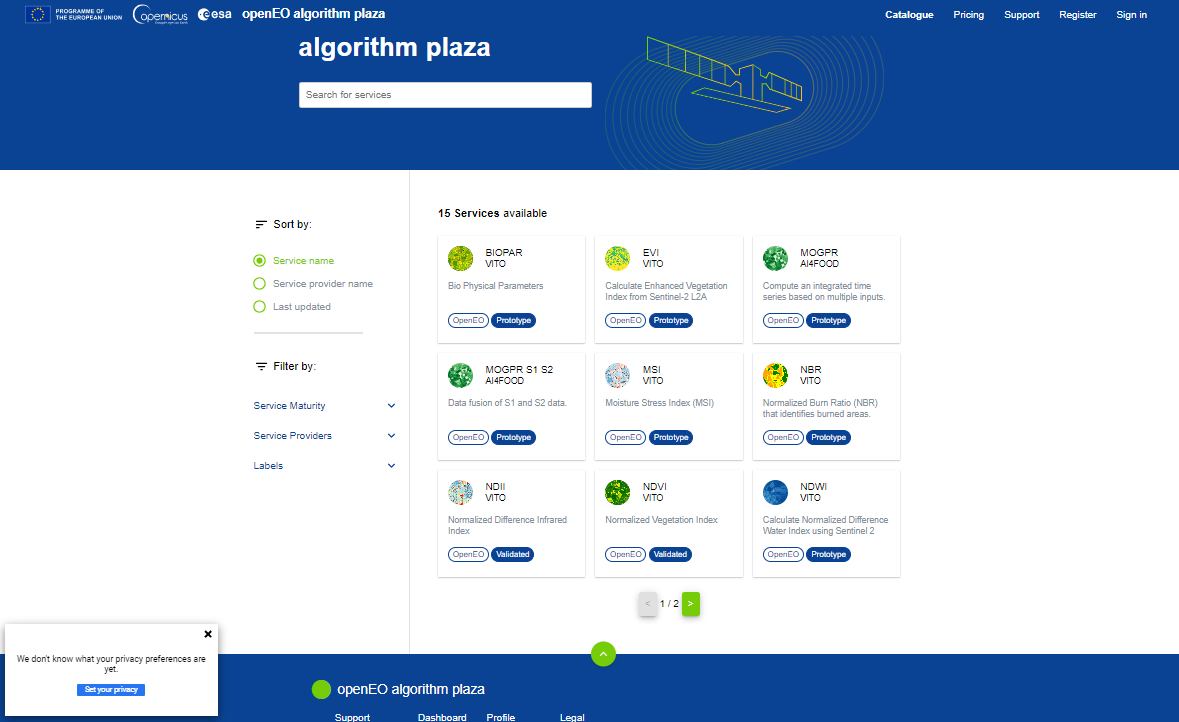


For more information on using and sharing the EO algorithms to/from openEO Algorithm Plaza, visit [this page](https://documentation.dataspace.copernicus.eu/Applications/AlgorithmPlaza.html).